In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai_client import OpenAIClient
from IPython.core.interactiveshell import InteractiveShell

In [2]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
products = pd.read_csv("data/clean_products.csv")
products = products.drop(columns=["raw_data", "id", "raw_length"])

# convert values that say `Not available` to np.nan
products = products.replace("Not available", np.nan)
products.head(3)

,name,size,form,processor,core,frequency,memory,voltage,io,thermal,feature,type,specification,manufacturer,location,description,summary
0,SMARCsXEL E,82 x 50 mm,SMARC module,"Intel Atom, Pentium, Celeron series",Up to 4 cores,Up to 3.0 GHz,Up to 8 GByte LPDDR4 memory with in-band ECC support,5V wide-range input,"4x USB, 2x USB 2.0, 2x SATA, 2x LAN, PCIe, HDMI, DP, LVDS, eDP, serial interfaces, HD Audio, I2S, I2C, SPI, GPIOs","Industrial temperature grade versions available, passive cooling options","TSN support, Trusted Platform Module (TPM), Industrial Temperature Grade versions",Single Board Computers,"Supports Intel Atom, Pentium, Celeron processors, up to 8 GByte LPDDR4 memory, multiple I/O interfaces, industrial temperature range, TPM, TSN support",Kontron,"Kontron Europe GmbH, Gutenbergstraße, Ismaning, Germany","The SMARCsXEL E is a SMARC module featuring the latest generation Intel Atom, Pentium, and Celeron processors, designed for industrial applications with support for in-band ECC memory, multiple I/O interfaces, and industrial temperature ranges.","SMARCsXEL E is a high-performance SMARC module with Intel Atom, Pentium, and Celeron processors, offering robust industrial features and extensive I/O support."
1,CM Industrial V,Length x Width x Height: Not available,NaN,BCM2837,4 cores (ARM Cortex-A53),1.2 GHz,"1GB, 2GB, 4GB, 8GB RAM options; 8GB, 16GB, 32GB, 64GB eMMC options","5V DC (standard), 9-24V DC (wide range)","Gigabit Ethernet, USB, HDMI, microSD Card Slot, SIM Card Slot, ADC, RS232, RS485, Isolated DI, Relay, SPI Flash, RTC, Buzzer, MIPI DSI, MIPI CSI, miniPCIe, UART, GPIO, microUSB, PoE","Fan control interface, adjustable speed fan control","Supports Raspberry Pi Compute Module, multiple industrial communication interfaces, PoE function, dual-band WiFi, Bluetooth, 4G LTE module support, onboard serial Flash, wide power supply range, ESD protection",Industrial Embedded Computer,"CPU: BCM2837, ARM Cortex-A53, 1.2 GHz, 64-bit; Memory: 1GB, 2GB, 4GB, 8GB RAM options; eMMC: 8GB, 16GB, 32GB, 64GB options; Ethernet: Dual Gigabit Ethernet; WiFi: Dual-band; Bluetooth: 4.2; 4G LTE: Optional; HDMI: Standard HDMI, FPC HDMI; USB: Multiple USB interfaces; GPIO: Raspberry Pi compatible; Power Input: 5V DC, 9-24V DC; Operating Temperature: -20°C to 70°C","Shanghai EDA Technology Co., Ltd.","Room 101, Building 1, No. 123 Jialuo Highway, Jiading District, Shanghai","CM Industrial is an industrial embedded computer based on the Raspberry Pi Compute Module, designed for IoT gateway, industrial control, advertising display, and intelligent manufacturing applications.","CM Industrial V is an industrial embedded computer featuring the Raspberry Pi Compute Module, offering extensive communication interfaces, dual-band WiFi, Bluetooth, 4G LTE support, and a wide power supply range, suitable for various industrial applications."
2,VIIMA RIIMA,170mm x 170mm,Mini-ITX,AMD Ryzen Embedded V1000/R1000 Series APU,NaN,NaN,"DDR4 2400MHz, ECC support, Max 32GB, 2 x SODIMM",DC-in 12V~24V,"DisplayPort, LVDS, eDP, USB 3.1 Gen 1, USB 2.0, Ethernet, Serial Port, Audio jack, DC jack","CPU Fan header, Chassis Fan header, PWM mode","Up to four 4K displays, Wide temperature range endurance (-40°C to 85°C), Up to 10-year longevity supply",Industrial Motherboard,"Supports up to four 4K displays, PCIe x16 slot, PCIe x4 slot, M.2 M key, M.2 E key, Realtek ALC888S audio codec, Realtek RTL8111H Ethernet controller, TPM 2.0 support",ASUS,NaN,"The VIIMA RIIMA is an industrial motherboard designed for high-performance applications, featuring AMD Ryzen Embedded APUs, multiple display outputs, and extensive connectivity options.","Industrial motherboard with AMD Ryzen Embedded APUs, supporting up to four 4K displays and wide temperature range endurance."


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           99 non-null     object
 1   size           74 non-null     object
 2   form           74 non-null     object
 3   processor      96 non-null     object
 4   core           52 non-null     object
 5   frequency      76 non-null     object
 6   memory         97 non-null     object
 7   voltage        91 non-null     object
 8   io             98 non-null     object
 9   thermal        86 non-null     object
 10  feature        99 non-null     object
 11  type           99 non-null     object
 12  specification  99 non-null     object
 13  manufacturer   98 non-null     object
 14  location       33 non-null     object
 15  description    99 non-null     object
 16  summary        99 non-null     object
dtypes: object(17)
memory usage: 13.4+ KB


In [5]:
# sort products by type based on the spelling
products["type"] = products["type"].str.lower()
products["type"] = products["type"].str.replace(r"\(.*?\)", "", regex=True)
products["type"] = products["type"].str.replace(" ", "_")
products["type"] = products["type"].apply(lambda x: x[:-1] if isinstance(x, str) and x.endswith("s") else x)

<Axes: ylabel='count'>

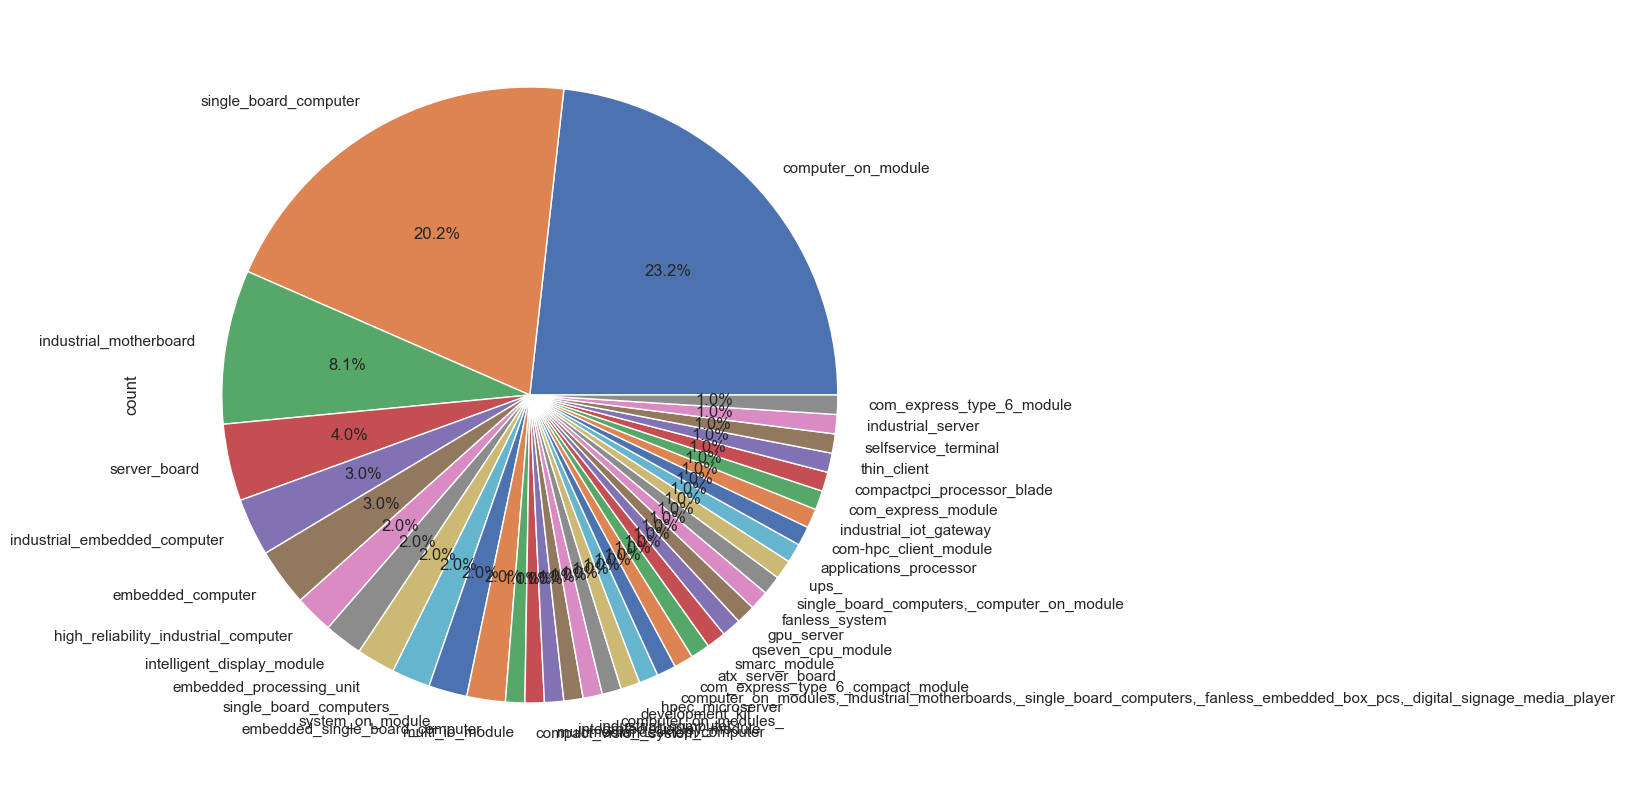

In [6]:
# create pie chart of product types
products["type"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10, 10))

<Axes: ylabel='count'>

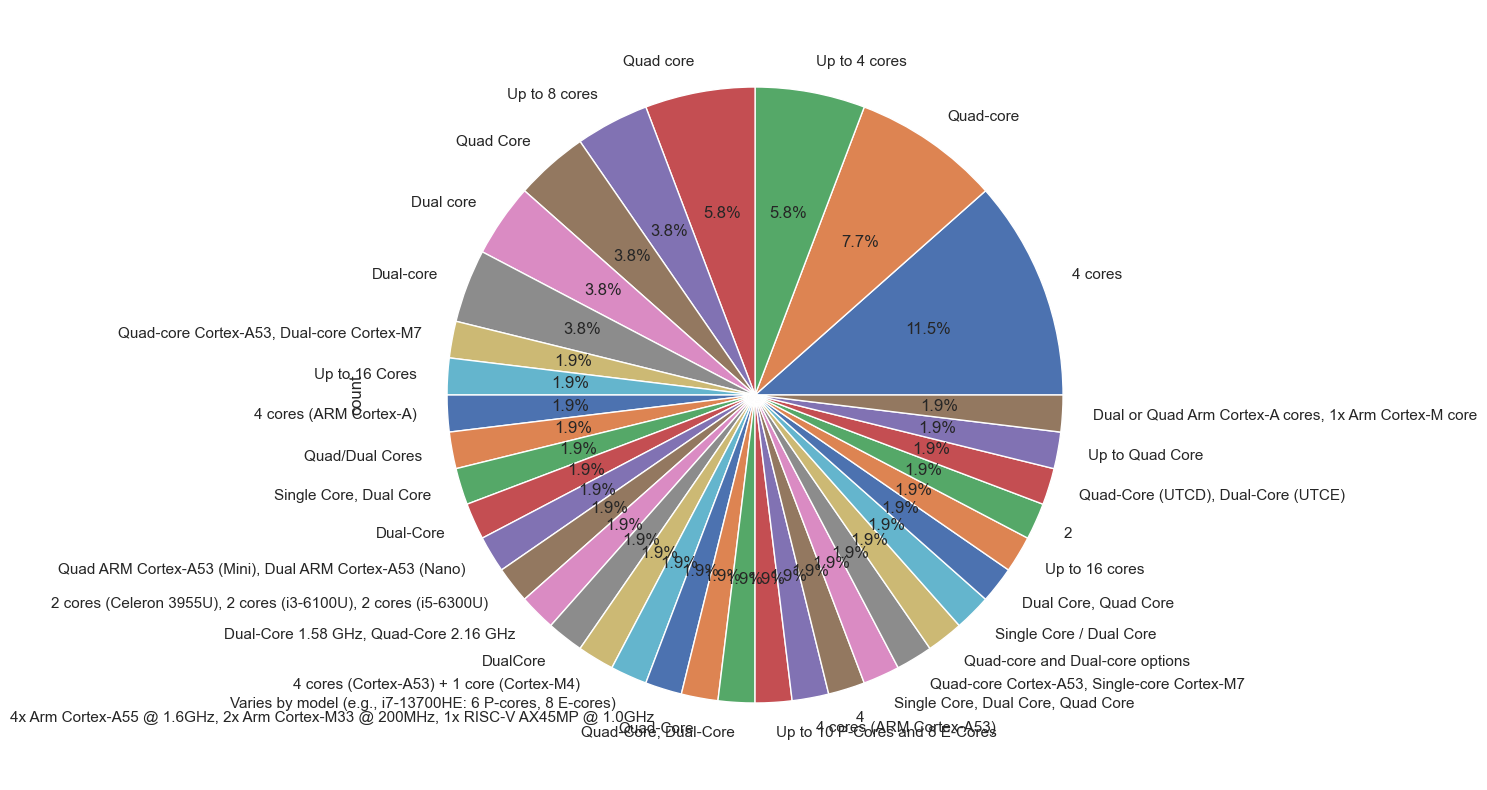

In [12]:
products["core"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10, 10))

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='manufacturer', ylabel='Count'>

Text(0.5, 1.0, 'Price Distribution')

Text(0.5, 0, 'core')

Text(0, 0.5, 'Frequency')

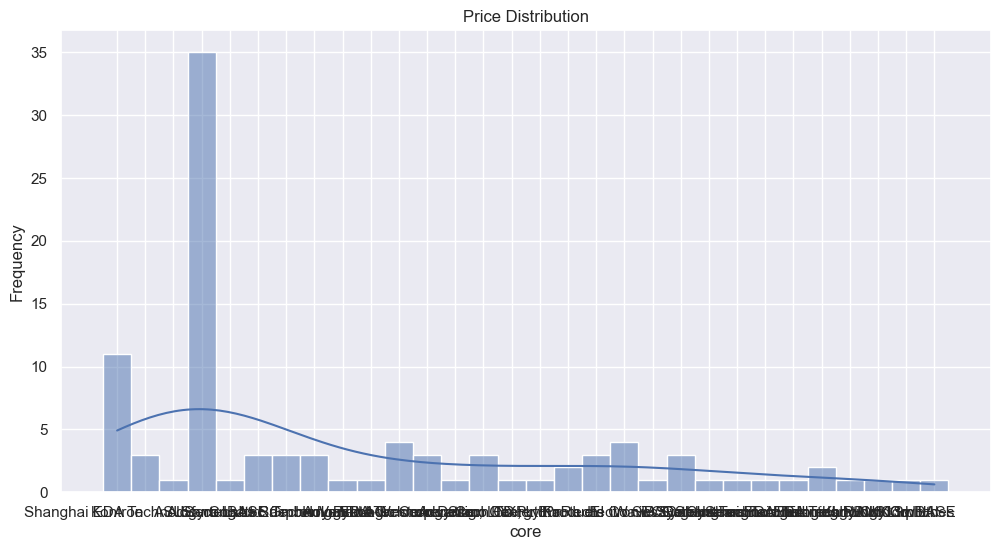

In [13]:
# Further exploration
# 1. Distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(products["manufacturer"], kde=True)
plt.title("Price Distribution")
plt.xlabel("core")
plt.ylabel("Frequency")
plt.show()

In [14]:
products.columns

Index(['name', 'size', 'form', 'processor', 'core', 'frequency', 'memory',
       'voltage', 'io', 'thermal', 'feature', 'type', 'specification',
       'manufacturer', 'location', 'description', 'summary'],
      dtype='object')